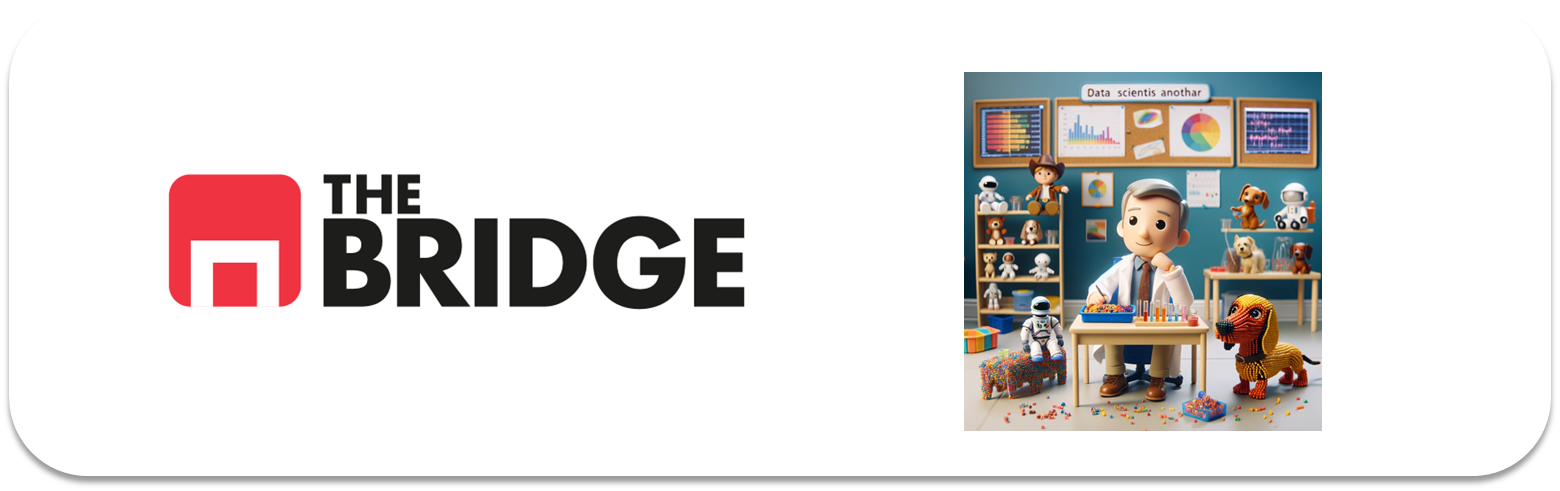

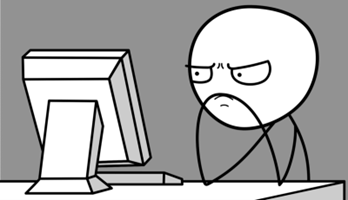

Para ejercitarte y afianzar lo aprendido sobre dispersión, distribución y outliers, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
from bootcampviztools import *
import pandas as pd

### Ejercicio 1

Carga en un dataframe los datos contenidos en la ruta "./data/car_crashes.csv", muestra un parte de su contenido y la info general del mismo

In [2]:
df_cars = pd.read_csv('./data/car_crashes.csv', sep = '|', index_col = 0)
df_cars.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [3]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.6+ KB


### Ejercicio 2

Haz una pequeña descripción de lo que crees que puede representar cada una de las variables y de que puede representar el dataset. Aunque para algunas se proporciona aquí:

* "total" - Número de accidentes fatales por colisión de vehñculos por mil millones de millas
* "ins_premiums" - Prima media de Seguros de Automóviles ($)
* "ins_losses" - Pérdidas incurridas por las compañías de seguros por colisiones por conductor asegurado ($)

**ACLARACION IMPORTANTE**: El resto de columnas están dadas en las mismas unidades que total (numero de accidentes fatales por mil millones de millas)

In [4]:
df_cars.nunique()

total             45
speeding          50
alcohol           50
not_distracted    50
no_previous       50
ins_premium       51
ins_losses        51
abbrev            51
dtype: int64

**Descripción:** *Pérdidas de seguros por accidentes de coches, por estado*

**Variable**|**Descripción**|**Tipo**|**Importancia**|**Notas**
---|---|---|---|---
total|Número de accidentes fatales por colisión de vahículos por mil millones de millas|Numérica continua|0||
speeding|Porcentaje de accidentes causados por exceso de velocidad|Numérica continua|1||
alcohol|Porcentaje de accidentes causados por exceso de alcohol|Numérica continua|1||
not_distracted|Porcentaje de accidentes causados por conductor no distraído|Numérica continua|1||
no_previous|Porcentaje de conductores sin accidentes previos|Numérica continua|1||
ins_premium|Prima media de seguros de automóviles ($)|Numérica continua|0||
ins_losses|Pérdidas incurridas por las compañías de seguros por colisiones por conductor asegurado ($)|Numérica continua|0||

### Ejercicio 3

Vamos a analizar las medidas de tendencia central (media, mediana), las de posición (los cuartiles) y los rangos de las variables numéricas del dataset. Muestra esos valores para todas las variables numéricas del dataset.  

**IMPORTANTE**:
*Al ser los valores porcentajes, tenemos que convertirlos a valores absolutos (multiplicar los valores de las columnas de cada fila por el total de esa fila, excepto total) si queremos poder contabilizar medias reales entre todos los estados*  


In [30]:
df_estadistica = df_cars[['speeding','alcohol','not_distracted','no_previous']].mul(df_cars['total']/100, axis=0)
df_estadistica['total'] = df_cars.total
df_estadistica.head()

,speeding,alcohol,not_distracted,no_previous,total
0,1.378416,1.060320,3.393024,2.827520,18.8
1,1.343201,0.819025,2.948490,3.079534,18.1
2,1.210860,0.968688,2.906064,3.321216,18.6
3,0.903168,1.304576,4.716544,4.766720,22.4
4,0.504000,0.403200,1.310400,1.281600,12.0


In [31]:
df_estadistica = df_estadistica.describe().T.rename(columns = {'mean':'media','50%':'mediana','25%':'q1','75%':'q3'})
df_estadistica['rango'] = df_estadistica['max'] - df_estadistica['min']
df_estadistica[['media','mediana','q1','q3','rango']].round(2)

,media,mediana,q1,q3,rango
speeding,0.84,0.68,0.48,1.19,2.05
alcohol,0.83,0.69,0.48,1.04,2.31
not_distracted,2.29,2.06,1.24,3.01,5.35
no_previous,2.36,2.18,1.50,3.09,4.58
total,15.79,15.60,12.75,18.50,18.00


### Ejercicio 4

¿Qué puedes decir de la variable abbrev?¿Qué crees que podríamos hacer con ella?¿Le cambiarías el nombre?

*Es un índice que representa cada estado. Podría establecerse como índice, facilitando las consultas*

Nota: Para los siguientes ejercicios te convendrá hacerte una función que obtenga el CV (Coeficiente de variación), y guardárla para el futuro

In [41]:
def coeficiente_variacion(df):
    df_2 = df.describe().T
    CV = df_2['std'] / df_2['mean'] * 100
    return CV

### Ejercicio 5

Analiza `speeding` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

In [54]:
df_estadistica = df_estadistica[['media','mediana','q1','q3','rango']].round(2)
df_estadistica['coef_var'] = coeficiente_variacion(df_cars).round(2)
df_estadistica

,media,mediana,q1,q3,rango,coef_var
speeding,0.84,0.68,0.48,1.19,2.05,40.37
alcohol,0.83,0.69,0.48,1.04,2.31,35.38
not_distracted,2.29,2.06,1.24,3.01,5.35,33.22
no_previous,2.36,2.18,1.50,3.09,4.58,26.88
total,15.79,15.60,12.75,18.50,18.00,26.10


(2,)


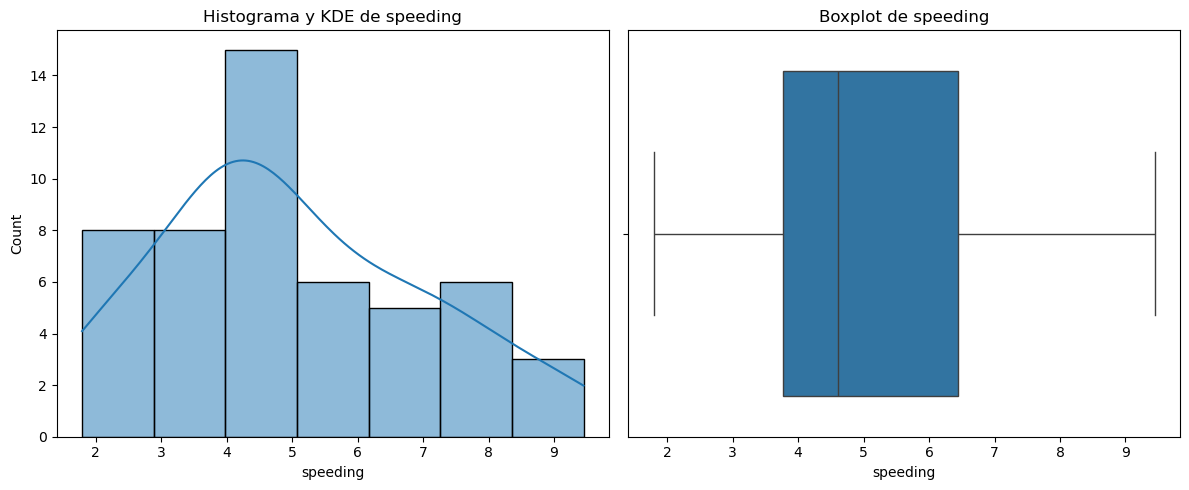

In [44]:
plot_combined_graphs(df_cars, ['speeding'])

### Ejercicio 6

Analiza `alcohol` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

(2,)


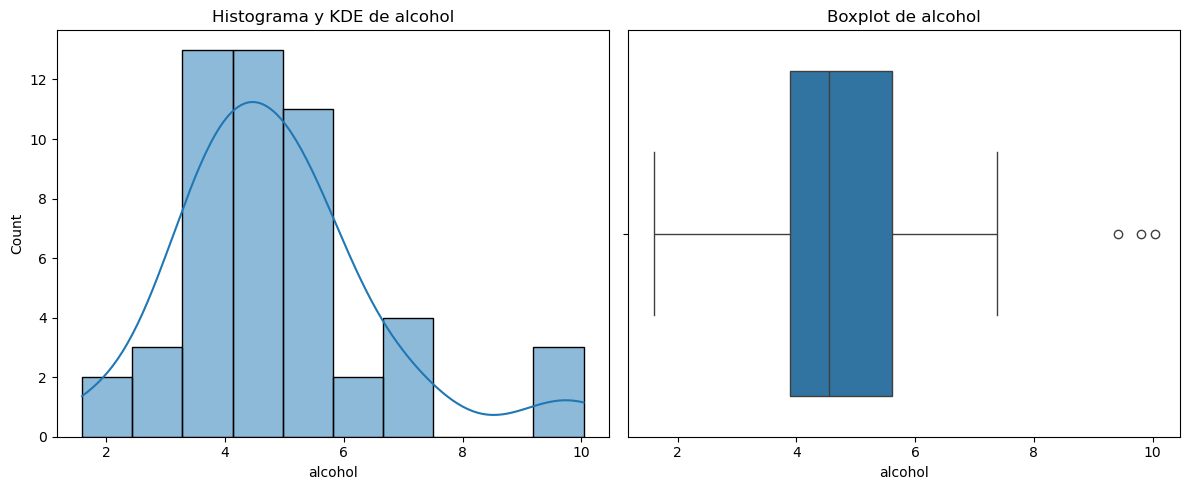

In [45]:
plot_combined_graphs(df_cars, ['alcohol'])

### Ejercicio 7

Analiza `not_distracted` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

(2,)


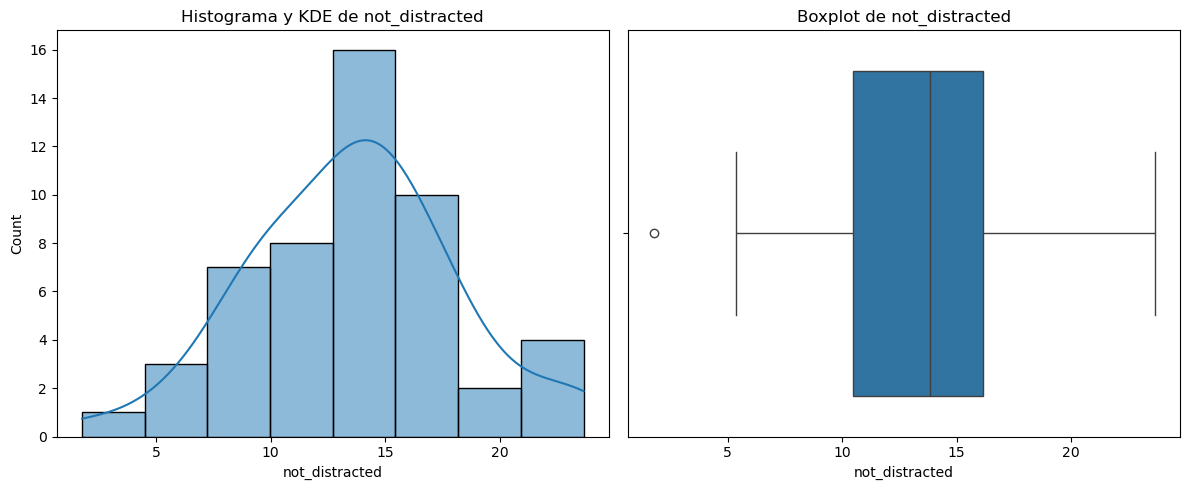

In [46]:
plot_combined_graphs(df_cars, ['not_distracted'])

### Ejercicio 8

El diagrma de violín es un tipo de gráfico que no hemos usado pero que tu puedes usar para tu análisis. Combina elementos de diagrama de caja y de la estimación de la función de densidad. 

Ejecuta la siguiente celda y luego dibuja el boxplot y el histograma combinado con la función de densidad para ver qué te parece más interesante. Usa `plot_combined_graphs`)

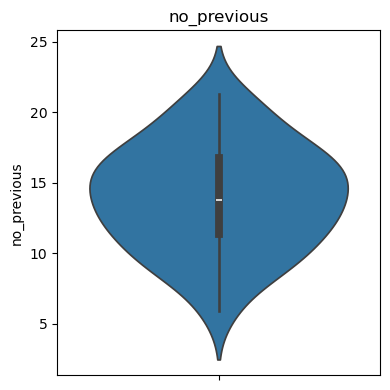

In [48]:
from bootcampviztools import mostrar_diagramas_violin

mostrar_diagramas_violin(df_cars, ["no_previous"])

(2,)


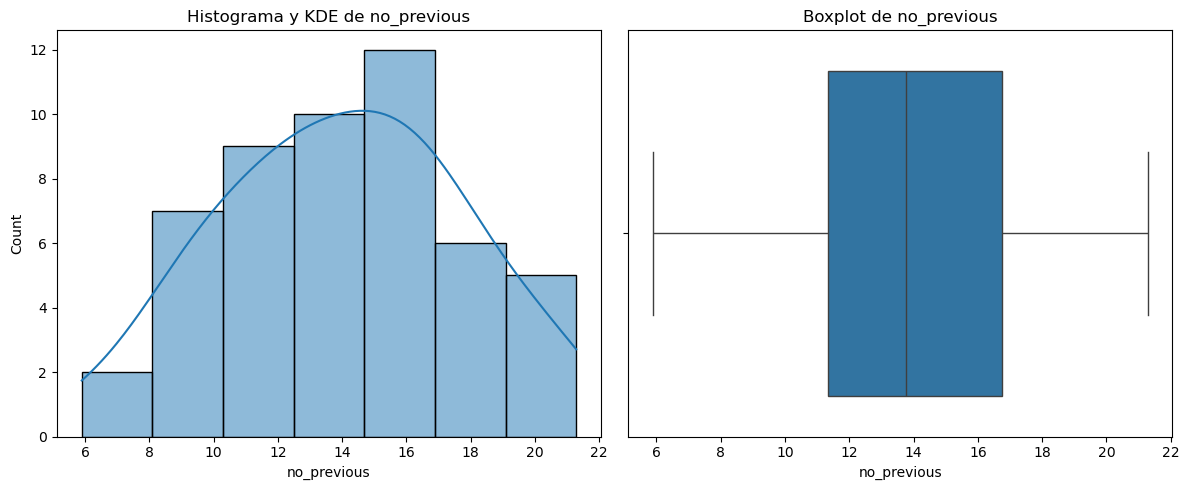

In [49]:
plot_combined_graphs(df_cars, ['no_previous'])

La figura presenta un plotbox interno con la mediana marcada con una línea gruesa y el rango intercuartílico dibujado en el centro, además de que la forma se lo da la función densidad estimada (replicada simétricamente):

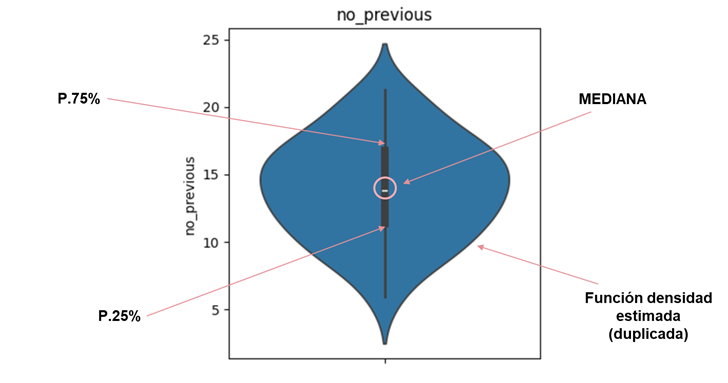

### Ejercicio 9

Completa el análisis de "no_previous" con su CV y sus medidas de tendencia central. ¿Qué destacarías? (considera gráficas y medidas obtenidas en este apartado)

In [55]:
df_estadistica

,media,mediana,q1,q3,rango,coef_var
speeding,0.84,0.68,0.48,1.19,2.05,40.37
alcohol,0.83,0.69,0.48,1.04,2.31,35.38
not_distracted,2.29,2.06,1.24,3.01,5.35,33.22
no_previous,2.36,2.18,1.50,3.09,4.58,26.88
total,15.79,15.60,12.75,18.50,18.00,26.10


### Ejercicio 10

Carga el dataset de los seguros ("./data/Marketing-Customer-Analysis.csv") en un datafame y pinta la gráfica de caja y el histograma de "customer_lifetime_value"

In [58]:
df_seguros = pd.read_csv('./data/Marketing-Customer-Analysis.csv')
df_seguros.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(2,)


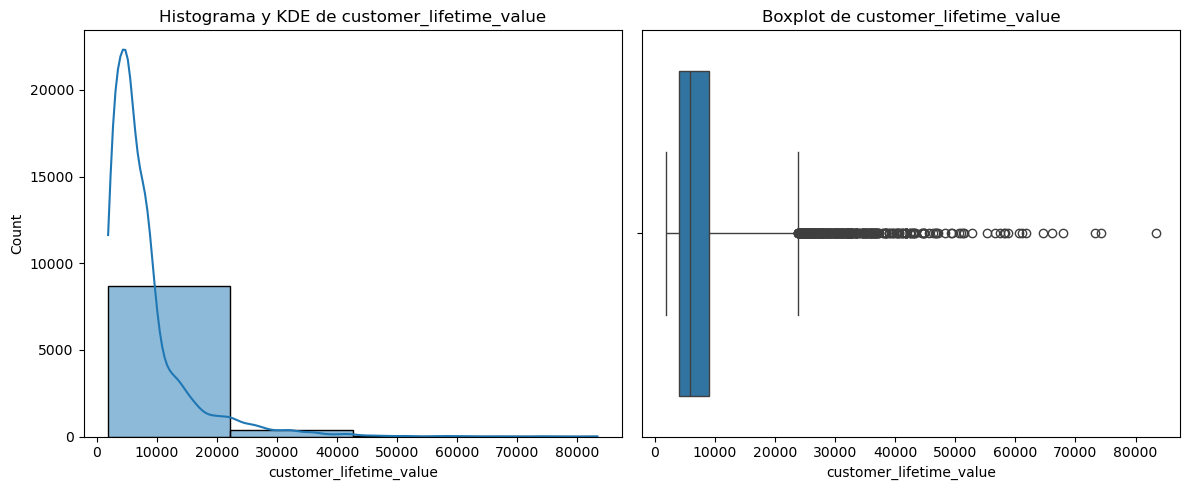

In [66]:
plot_combined_graphs(df_seguros, ['customer_lifetime_value'], whisker_width=3, bins=4)

### Ejercicio 11

Para "customer_lifetime_value", escoge un umbral para marcar como outliers los valores que lo superen. Divide el dataframe en dos usando ese valor.

In [70]:
umbral = 25000
df_CLV_menor = df_seguros[df_seguros['customer_lifetime_value'] <= 25000]
df_CLV_mayor = df_seguros[df_seguros['customer_lifetime_value'] > 25000]

### Ejericicio 12

Compara los histogramas para "customer_lifetime_value" de cada dataframe. ¿Qué conclusiones sacas?

<Axes: >

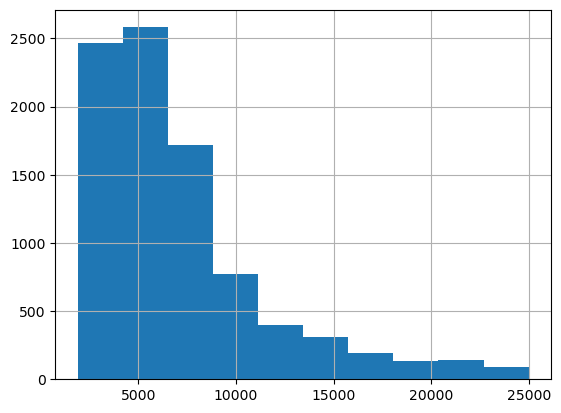

In [72]:
df_CLV_menor.customer_lifetime_value.hist()

<Axes: >

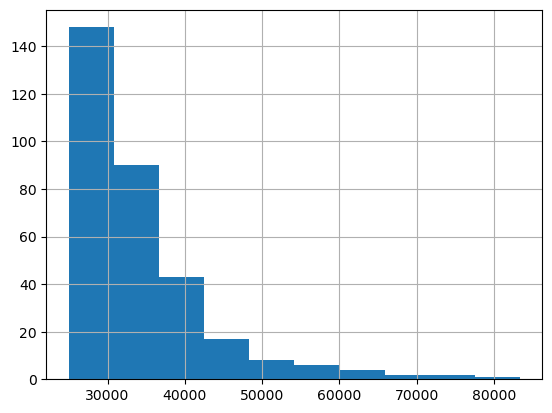

In [73]:
df_CLV_mayor.customer_lifetime_value.hist()